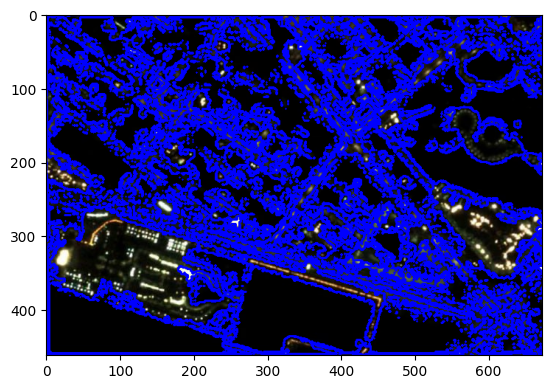

In [5]:
import cv2
import matplotlib.pyplot as plt
image = plt.imread(r'C:\Users\coolm\\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Применение адаптивной бинаризации для выявления тёмных областей
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Поиск контуров тёмных областей
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров на изображении
cv2.drawContours(image, contours, -1, (0, 0, 255), 2)

# Отображение изображения с маркировками
plt.imshow(image)
plt.show()

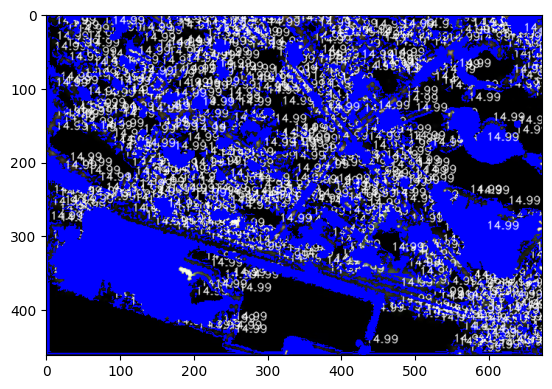

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Загрузка изображения
image = plt.imread(r'C:\Users\coolm\\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Применение адаптивной бинаризации для выявления тёмных областей
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Поиск контуров тёмных областей
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Создание словаря для хранения групп контуров по координатам их центров
contour_groups = defaultdict(list)

# Итерация по всем контурам
for contour in contours:
    # Нахождение координат центра контура
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        
        # Добавление контура в группу с теми, у которых центр находится рядом
        added_to_group = False
        for group in contour_groups:
            if ((cx - group[0]) ** 2 + (cy - group[1]) ** 2) < 100 and len(contour_groups[group]) < 5:
                contour_groups[group].append(contour)
                added_to_group = True
                break
        if not added_to_group:
            contour_groups[(cx, cy)].append(contour)

# Объединение контуров в каждой группе
for group in contour_groups.values():
    merged_contour = np.concatenate(group)
    # Вычисление оценки темноты
    mean_value = np.mean(gray[np.where(thresh == 0)])
    if mean_value < 100:  # Закрашивать только тёмные участки
        if mean_value < 50:
            color = (0, 0, 255)
        else:
            color = (0, 128, 255)
        # Закрашивание объединённого контура
        cv2.drawContours(image, [merged_contour], -1, color, -1)
        # Добавление оценки темноты как текста внутри контура
        cx, cy = np.mean(merged_contour, axis=0).astype(int)[0]
        cv2.putText(image, str(round(mean_value, 2)), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

# Отображение и сохранение изображения с маркировками
plt.imshow(image)
plt.show()

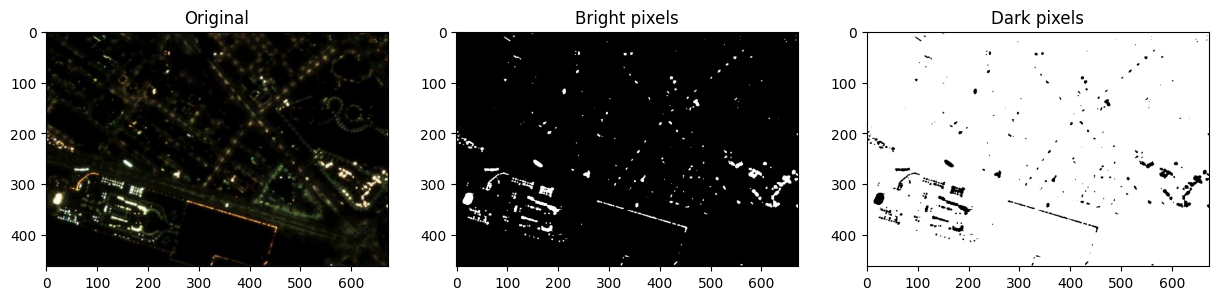

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

# загрузка изображения
img = plt.imread(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# преобразование изображения в одномерный массив
flat_img = img.reshape((-1, 3))

# выполнение кластеризации на две группы - светлые и темные пиксели
kmeans = KMeans(n_clusters=2, random_state=0).fit(flat_img)

# определение индексов пикселей каждой группы
bright_pixels = np.where(kmeans.labels_ == 1)[0]
dark_pixels = np.where(kmeans.labels_ == 0)[0]

# создание маркера для светлых пикселей
bright_marker = np.zeros_like(kmeans.labels_)
bright_marker[bright_pixels] = 1
bright_marker = bright_marker.reshape(img.shape[:2])

# создание маркера для темных пикселей
dark_marker = np.zeros_like(kmeans.labels_)
dark_marker[dark_pixels] = 1
dark_marker = dark_marker.reshape(img.shape[:2])

# отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(bright_marker, cmap='gray')
ax[1].set_title('Bright pixels')
ax[2].imshow(dark_marker, cmap='gray')
ax[2].set_title('Dark pixels')
plt.show()

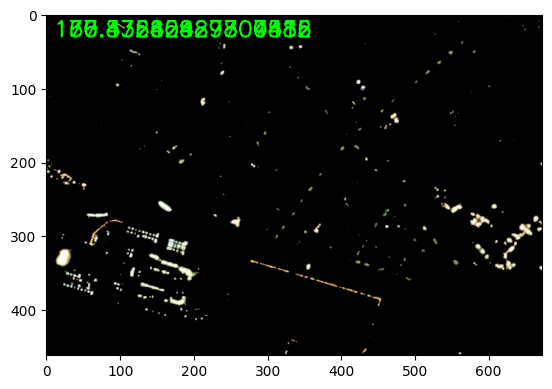

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# загрузка изображения
img = plt.imread(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# определение порогового значения для оценки освещенности
threshold = 100

# применение алгоритма Otsu для сегментации изображения
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# фильтрация по контурам для улучшения качества сегментации
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(thresh, [cnt], 0, 255, -1)

# разделение на сегменты
segments = np.zeros_like(img)
for i in range(3):
    segments[:, :, i] = cv2.bitwise_and(img[:, :, i], thresh)

# вычисление оценки освещенности для каждого сегмента
for i in range(3):
    mean_val = cv2.mean(segments[:, :, i], thresh)[0]
    # задание цвета текста в зависимости от уровня освещенности
    if mean_val < threshold:
        text_color = (0, 0, 255) # красный цвет
    else:
        text_color = (0, 255, 0) # зеленый цвет
    # добавление оценки освещенности на изображение
    cv2.putText(segments, str(mean_val), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)
  
plt.imshow(segments)
plt.show()  
# отображение результата




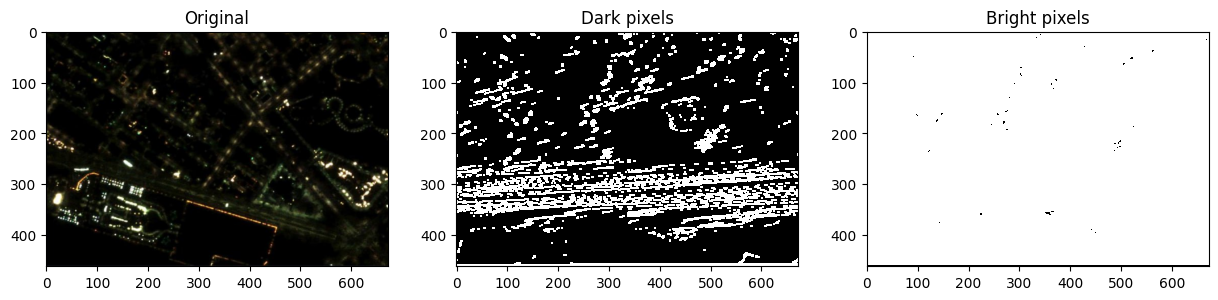

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.morphology import binary_closing, binary_opening
from skimage.filters import threshold_otsu


# загрузка изображения
img = plt.imread(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# преобразование изображения в оттенки серого
gray_img = rgb2gray(img)

# выполнение морфологической фильтрации для удаления шума и объединения близких областей
closed_img = binary_closing(gray_img > 0.5)
opened_img = binary_opening(closed_img)

# определение порогового значения для сегментации на основе яркости
thresh = threshold_otsu(gray_img[opened_img])

# сегментация на основе порогового значения
mask = gray_img < thresh

# создание маркера для всех пикселей
dark_marker = np.zeros_like(mask, dtype=int)

# заполнение маркера только значениями для темных пикселей
dark_pixels = np.where(mask)
dark_marker[dark_pixels] = 1

# выполнение кластеризации на основании темных областей
flat_img = img.reshape((-1, 3))
dark_pixels = np.where(dark_marker.reshape(-1) == 1)[0]
kmeans = KMeans(n_clusters=2, random_state=0).fit(flat_img[dark_pixels])

# определение индексов пикселей каждой группы
bright_pixels = np.where(kmeans.labels_ == 0)[0]
dark_pixels = np.where(kmeans.labels_ == 1)[0]

# создание маркера для темных пикселей
dark_marker = np.zeros_like(mask, dtype=int)
dark_pixel_coords = np.transpose(np.unravel_index(dark_pixels, mask.shape))
dark_marker[dark_pixel_coords[:, 0], dark_pixel_coords[:, 1]] = 1

# отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(np.ma.masked_where(dark_marker == 0, dark_marker), cmap='gray')
ax[1].set_title('Dark pixels')
ax[2].imshow(np.ma.masked_where(dark_marker == 1, dark_marker), cmap='gray')
ax[2].set_title('Bright pixels')
plt.show()

In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def get_polygons(image):
    # Проведем кластеризацию на основе цветового представления
    n_colors = 5
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image.reshape(-1,3))
    label = kmeans.labels_.reshape(image.shape[:2])

    # Создадим список для хранения полигонов
    polygons = []

    # Найдем контуры каждого объекта и сохраняем их в список полигонов
    for i in range(n_colors):
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        mask[label == i] = 255
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Ищем контуры больше заданного размера
        for j in range(len(contours)):
            area = cv2.contourArea(contours[j])
            perimeter = cv2.arcLength(contours[j], True)
            if area > 1000 and perimeter > 500:
                polygon = mask.copy()
                polygon[polygon != 255] = 0
                polygons.append(polygon)

    return polygons

def get_brightness(image):
    # Вычисление среднего значения яркости для изображения
    brightness = np.mean(image)
    
    return brightness

def visualize_polygons(image, polygons):
   for i in range(len(polygons)):
    polygon = polygons[i]
    # Конвертируем полигон обратно в цветовое пространство RGB
    poly_rgb = cv2.cvtColor(polygon, cv2.COLOR_GRAY2RGB)
    # Применяем маску к оригинальному изображению
    poly_rgb[poly_rgb == 255] = image[poly_rgb == 255]
    # Выводим полученное изображение
    plt.imshow(poly_rgb)
    plt.show()
def main(filename):
    
    image = plt.imread(filename)
    
    # Получение полигонов на изображении
    polygons = get_polygons(image)
    #visualize_polygons(image, polygons)
    # Вычисление освещенности для каждого полигона
    brightness_values = []
    for polygon in polygons:
        brightness = get_brightness(polygon.astype(np.uint8))
        brightness_values.append(brightness)
    
    # Вычисление общего процента освещенности снимка
    total_brightness = np.mean(brightness_values)
    total_brightness_percent = (total_brightness / 255) * 100
    
    # Вывод результатов
    print("Количество полигонов: {}".format(len(polygons)))
    print("Освещенность каждого полигона: {}".format(brightness_values))
    print("Общий процент освещенности снимка: {:.2f}%".format(total_brightness_percent))
    
    

main(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-14.jpg')

Количество полигонов: 65
Освещенность каждого полигона: [63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 63.024543042452834, 54.75408313679245, 54.75408313679245, 54.75408313679245, 54.75408313679245, 54.75408313679245, 54.75408313679245, 54.75408313679245, 25.61777712264151, 25.61777712264151, 25.61777712264151, 25.61777712264151, 25.61777712264151, 25.61777712264151, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388856132075, 69.33388

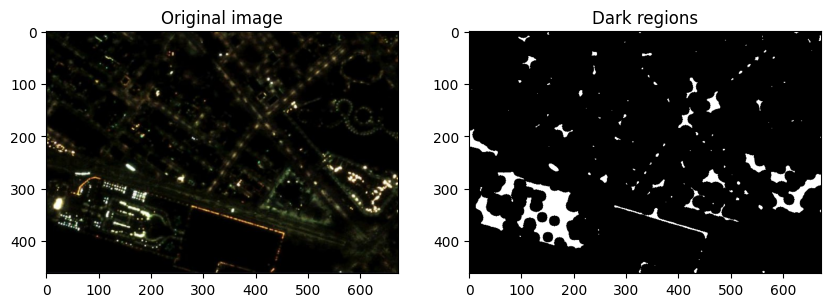

In [6]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.morphology import binary_opening, disk


# загрузка изображения
img = plt.imread(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# перевод в изображение в оттенки серого
gray_img = rgb2gray(img)

# применение морфологической обработки для удаления шума и объединения близких областей
opened_img = binary_opening(gray_img < threshold_otsu(gray_img), disk(10))

# создание маски, которая выделяет темные области
dark_mask = opened_img == 0

# отображение результата
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(dark_mask, cmap='gray')
ax[1].set_title('Dark regions')
plt.show()

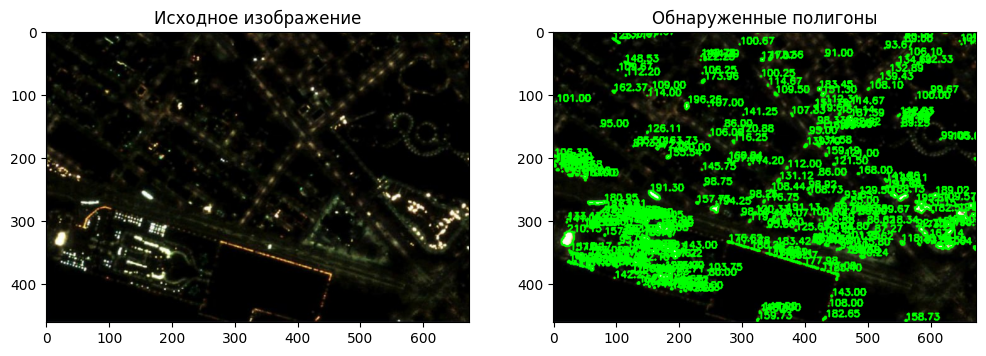

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def preprocess_image(image_path):
    img = plt.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return img, contours


def calculate_brightness_scores(img, contours):
    brightness_scores = []
    for c in contours:
        mask = np.zeros(img.shape[:2], np.uint8)
        cv2.drawContours(mask, [c], 0, 255, -1)
        mean_brightness = cv2.mean(img, mask=mask)[0]
        brightness_scores.append(mean_brightness)
    return brightness_scores


def visualize_results(img, contours, brightness_scores):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].set_title('Исходное изображение')
    for c, s in zip(contours, brightness_scores):
        cv2.drawContours(img, [c], 0, (0, 255, 0), 2)
        cv2.putText(img, f'{s:.2f}', tuple(c[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    ax[1].imshow(img)
    ax[1].set_title('Обнаруженные полигоны')


def main():
    image_path = r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg'
    img, contours = preprocess_image(image_path)
    brightness_scores = calculate_brightness_scores(img, contours)
    visualize_results(img, contours, brightness_scores)
    plt.show()
    
main()

Средняя яркость всего изображения: 14.78


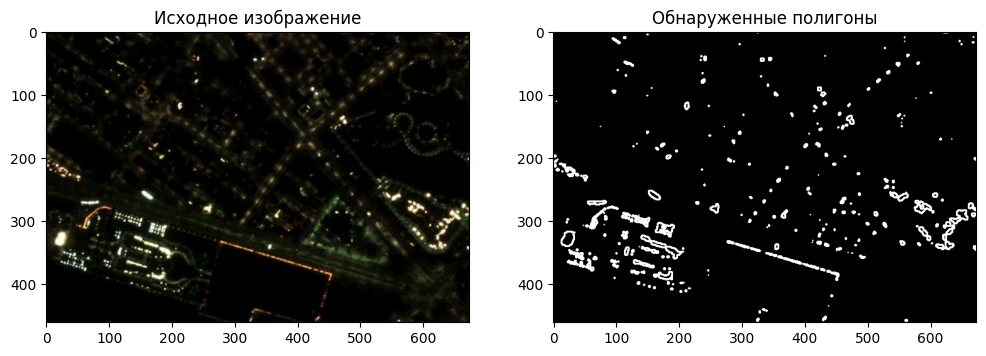

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def preprocess_image(image_path):
    img = plt.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return img, contours


def visualize_results(img, contours):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].set_title('Исходное изображение')
    ax[1].imshow(cv2.drawContours(np.zeros_like(img), contours, -1, (255, 255, 255), 2))
    ax[1].set_title('Обнаруженные полигоны')
    mean_brightness = cv2.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))[0]
    print(f'Средняя яркость всего изображения: {mean_brightness:.2f}')


def main():
    image_path = r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg'
    img, contours = preprocess_image(image_path)
    visualize_results(img, contours)
    plt.show()

main()

Средняя яркость всего изображения: 21.23


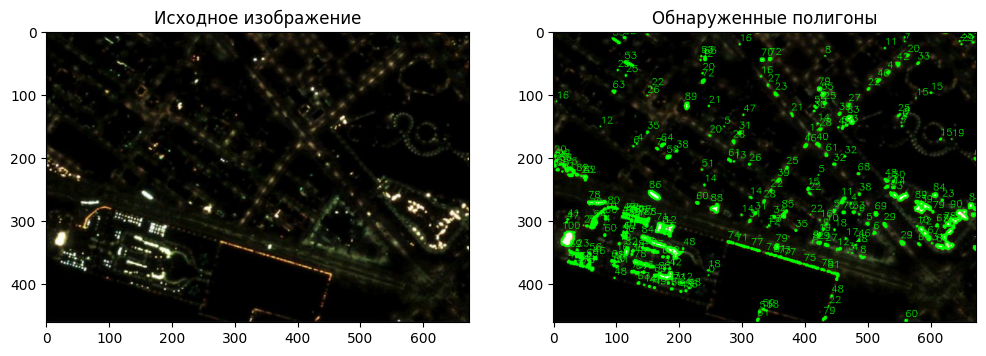

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def preprocess_image(image_path):
    img = plt.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return img, contours


def calculate_brightness_scores(img, contours):
    brightness_scores = []
    for c in contours:
        mask = np.zeros(img.shape[:2], np.uint8)
        cv2.drawContours(mask, [c], 0, 255, -1)
        mean_brightness = cv2.mean(img, mask=mask)[0]
        brightness_scores.append(mean_brightness)
    min_brightness = min(brightness_scores)
    max_brightness = max(brightness_scores)
    normalized_brightness_scores = [(b - min_brightness) / (max_brightness - min_brightness) * 100 for b in brightness_scores]
    return normalized_brightness_scores


def visualize_results(img, contours, normalized_brightness_scores):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].set_title('Исходное изображение')
    for c, s in zip(contours, normalized_brightness_scores):
        cv2.drawContours(img, [c], 0, (0, 255, 0), 2)
        x, y, _, _ = cv2.boundingRect(c)
        cv2.putText(img, f'{s:.0f}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    ax[1].imshow(img)
    ax[1].set_title('Обнаруженные полигоны')
    mean_brightness = cv2.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))[0]
    print(f'Средняя яркость всего изображения: {mean_brightness:.2f}')


def main():
    image_path = r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg'
    img, contours = preprocess_image(image_path)
    normalized_brightness_scores = calculate_brightness_scores(img, contours)
    visualize_results(img, contours, normalized_brightness_scores)
    plt.show()
main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


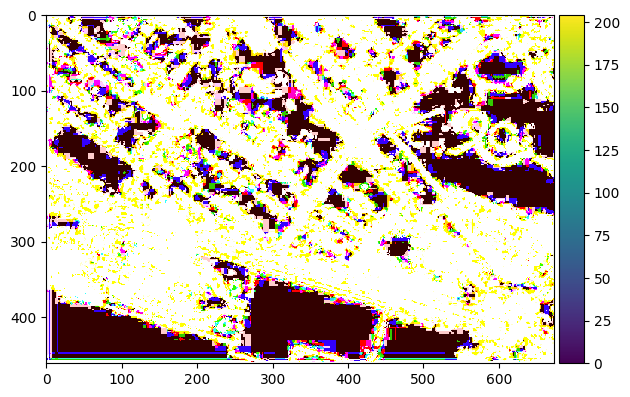

In [46]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.measure import label
from matplotlib.colors import ListedColormap

# Загрузка изображения
image = io.imread(r'C:\Users\coolm\OneDrive\Рабочий стол\City and Color\photo_2023-05-19_21-14-13.jpg')

# Преобразование в оттенки серого
gray_image = rgb2gray(image)

# Разделение изображения на регионы на основе яркости
labeled = label(gray_image < 0.5)

# Создание цветовой карты от красного до зеленого в зависимости от яркости
cmap = ListedColormap(np.flipud(np.array([(i/100.0, (100-i)/100.0, 0.0) for i in range(101)])), N=101)

# Окраска каждого региона в соответствии с оценкой яркости
colored_labels = cmap((gray_image * 100).astype(int))
colored_labels = np.delete(colored_labels, -1, axis=2)

# Слияние изображения и окрашенных регионов
output_image = image * 0.8 + colored_labels * 0.2

# Вывод результата
io.imshow(output_image)
io.show()